In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#need to install this package
from pyzipcode import ZipCodeDatabase
#from pypostalcode import PostalCodeDatabase
from util.vehiclesModeler import *
from util.location import *

In [2]:
OLD_PATH = "./data/oldData/"
PROC_PATH = "./data/processedData/"

## Processing *used_car_sales.csv*

In [3]:
months = range(1,12+1)
days = { 
    1: range(1, 31+1),
    2:range(1, 28+1),
    3:range(1, 31+1),
    4:range(1, 30+1),
    5:range(1, 31+1),
    6:range(1, 30+1),
    7:range(1, 31+1),
    8:range(1, 31+1),
    9:range(1, 30+1),
    10:range(1, 31+1),
    11:range(1, 30+1),
    12:range(1, 31+1)
}

In [4]:
from random import seed, choice
seed(1)

In [5]:
def get_date(df_year):
    month = choice(months)
    day = choice( days[month] )
    
    return pd.to_datetime(f"{day}-{month}-{df_year}", format="%d-%m-%Y")

In [3]:
df_used_cars = pd.read_csv(f"{OLD_PATH}/used_car_sales.csv")
df_used_cars.head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
0,137178,7500,2020,786**,84430,Ford,Mustang,1988,LX,5.0L Gas V8,Sedan,0,RWD,2020-11-23
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958,NaN,383 Fuel injected,Convertible,8,RWD,2019-09-30
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,2020-12-23
3,80773,11600,2019,07852,97200,Ford,Mustang,1968,Stock,289 cu. in. V8,Coupe,8,RWD,2019-06-30
4,64287,44000,2019,07728,40703,Porsche,911,2002,Turbo X-50,3.6L,Coupe,6,AWD,2019-09-25


In [7]:
df_used_cars["datesold"] = df_used_cars.yearsold.apply(get_date)
df_used_cars["datesold"].head()

0   2020-03-19
1   2019-02-09
2   2020-02-16
3   2019-08-16
4   2019-11-13
Name: datesold, dtype: datetime64[ns]

In [8]:
df_used_cars.describe(include="all", datetime_is_numeric=True)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
count,122144.000000,122144.000000,122144.000000,121235,1.221440e+05,122144,121571,1.221440e+05,73220,95046,101358,1.221440e+05,97293,122144
unique,NaN,NaN,NaN,15482,NaN,464,4289,NaN,24981,22399,2329,NaN,2814,NaN
top,NaN,NaN,NaN,92868,NaN,Ford,Mustang,NaN,XLT,350,Sedan,NaN,RWD,NaN
freq,NaN,NaN,NaN,3663,NaN,22027,4478,NaN,1477,2085,18216,NaN,42207,NaN
mean,85094.212397,10808.560715,2019.375467,NaN,1.404291e+06,NaN,NaN,3.959362e+03,NaN,NaN,NaN,1.758655e+04,NaN,2019-11-15 08:51:10.186009856
min,1.000000,0.000000,2018.000000,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,2018-01-01 00:00:00
25%,44547.250000,2950.000000,2019.000000,NaN,4.479225e+04,NaN,NaN,1.977000e+03,NaN,NaN,NaN,4.000000e+00,NaN,2019-05-25 00:00:00
50%,85555.500000,6500.000000,2019.000000,NaN,9.000000e+04,NaN,NaN,2.000000e+03,NaN,NaN,NaN,6.000000e+00,NaN,2019-10-23 00:00:00
75%,127078.500000,13800.000000,2020.000000,NaN,1.402000e+05,NaN,NaN,2.008000e+03,NaN,NaN,NaN,8.000000e+00,NaN,2020-05-05 00:00:00
max,165801.000000,404990.000000,2020.000000,NaN,1.235669e+09,NaN,NaN,2.014000e+07,NaN,NaN,NaN,2.147484e+09,NaN,2020-12-31 00:00:00


In [9]:
df_used_cars.isna().sum()[df_used_cars.isna().sum()>0]

zipcode        909
Model          573
Trim         48924
Engine       27098
BodyType     20786
DriveType    24851
dtype: int64

In [10]:
df_used_cars.isna().sum()[df_used_cars.isna().sum()>0]/df_used_cars.shape[0]

zipcode      0.007442
Model        0.004691
Trim         0.400544
Engine       0.221853
BodyType     0.170176
DriveType    0.203457
dtype: float64

Most of the columns with missing data are *Trim*, *Engine* and *BodyType* <br>
*Trim* has a high percentage of null values

In [11]:
len(df_used_cars) * 0.4

48857.600000000006

In [12]:
len(df_used_cars)

122144

In [13]:
df_used_cars[df_used_cars.duplicated()]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold


There are no duplicated rows

In [14]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            122144 non-null  int64         
 1   pricesold     122144 non-null  int64         
 2   yearsold      122144 non-null  int64         
 3   zipcode       121235 non-null  object        
 4   Mileage       122144 non-null  int64         
 5   Make          122144 non-null  object        
 6   Model         121571 non-null  object        
 7   Year          122144 non-null  int64         
 8   Trim          73220 non-null   object        
 9   Engine        95046 non-null   object        
 10  BodyType      101358 non-null  object        
 11  NumCylinders  122144 non-null  int64         
 12  DriveType     97293 non-null   object        
 13  datesold      122144 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(7)
memory usage: 13.0+ MB


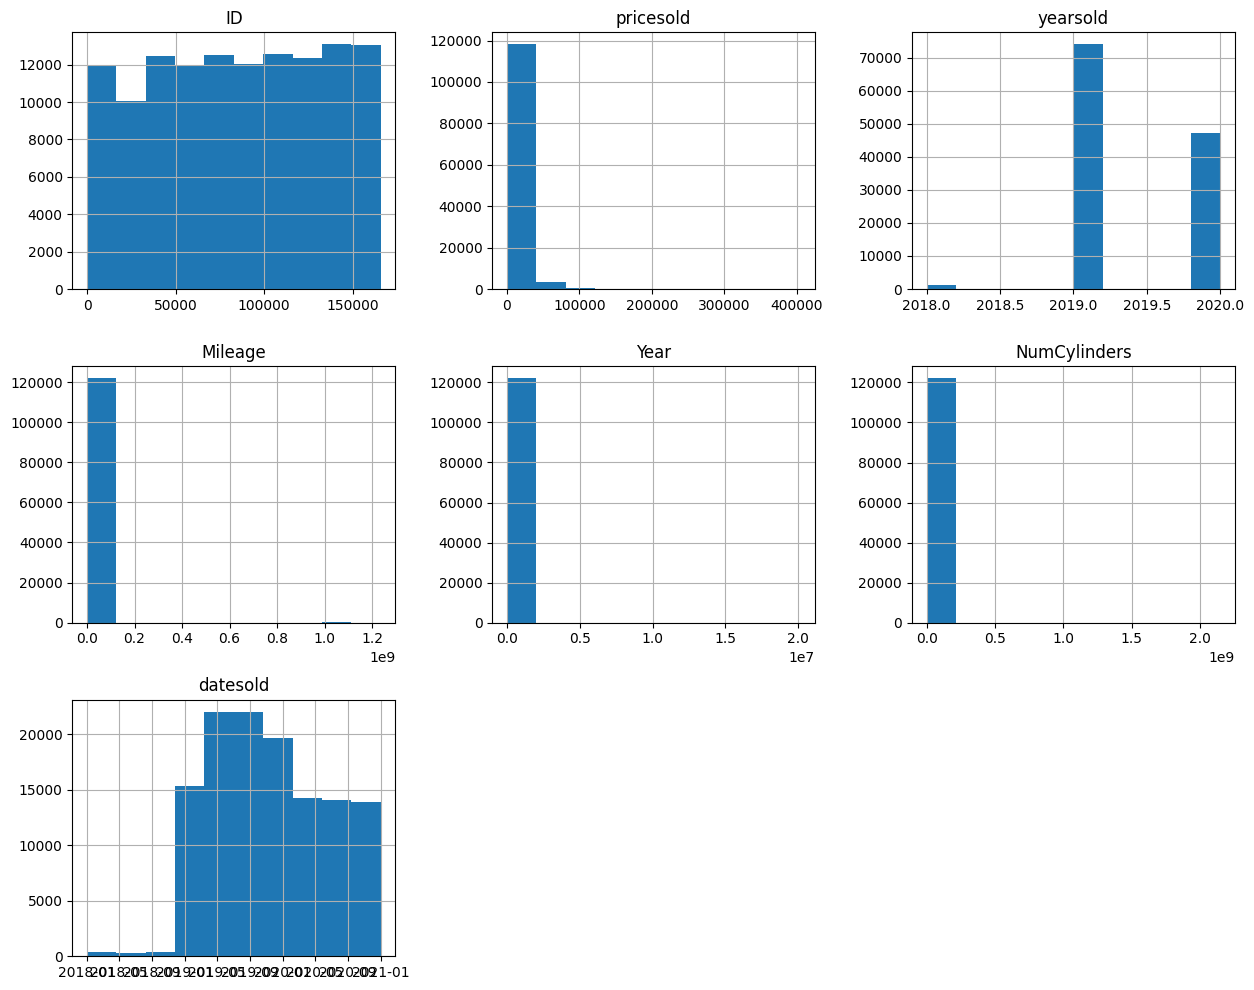

In [15]:
df_used_cars.hist(figsize=(15,12));

<Axes: xlabel='Model Year', ylabel='Number of Ocurrences'>

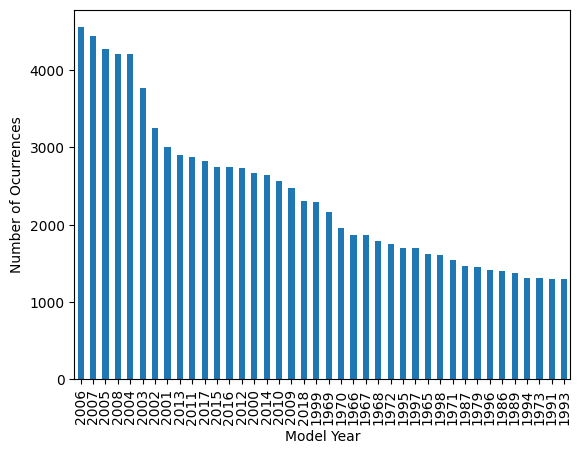

In [9]:
f = plt.figure()
df_used_cars.Year.value_counts().nlargest(40).plot(kind="bar", figure=f, xlabel="Model Year", ylabel="Number of Ocurrences")

In [10]:
f.savefig("year-bar.png")

In this dataset of used cars, the cars that were most sold are not the most recent, nor the most old. <br>
Probably the ones that are cheapest and have some economic features.

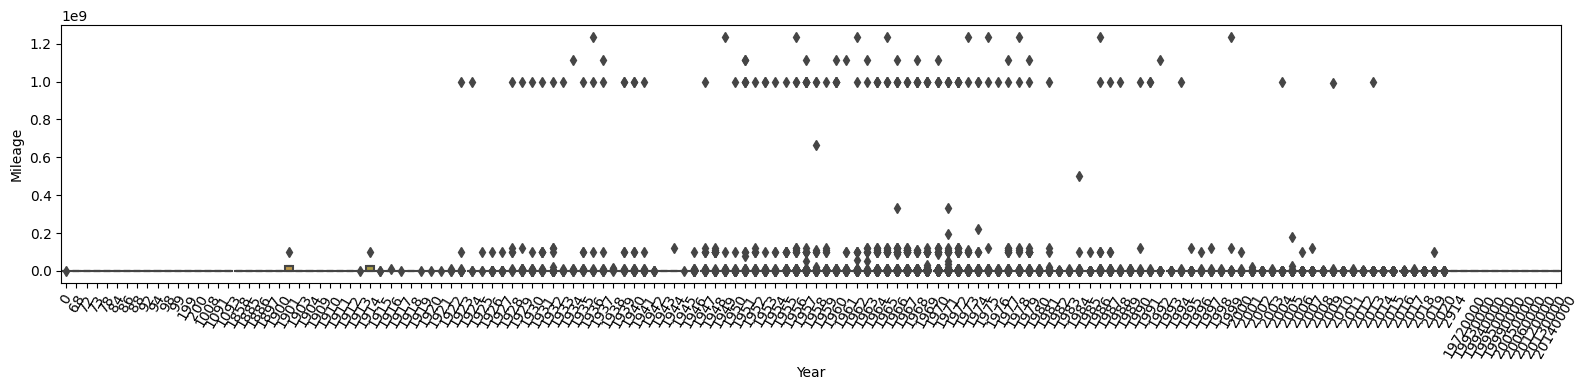

In [17]:
f, ax = plt.subplots(1,1,figsize=(16,4))
sns.boxplot(df_used_cars, x="Year", y="Mileage", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [18]:
df_used_cars.Year[df_used_cars.Year>9999]

10121     20130000
10122     20140000
19485     20140000
45307     19720000
80343     19940000
80793     19950000
80794     20120000
91326     20060000
91327     20120000
91691     19930000
117571    20050000
121621    19990000
Name: Year, dtype: int64

There are car years that are wrongly with 4 padded 0's that need to be removed

In [19]:
df_used_cars.Year = df_used_cars.Year.apply(lambda x: x if x < 9999 else x/10000)

In [20]:
df_used_cars.Year[df_used_cars.Year>9999]

Series([], Name: Year, dtype: float64)

There is a car that is from the year '2914'

In [21]:
df_used_cars[df_used_cars.Year==2914]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
101047,83251,12600,2019,11715,110307,Jeep,Grand Cherokee,2914.0,NaN,3.0 Eco Diesel,SUV,6,4WD,2019-01-18


this element will be removed

In [22]:
df_used_cars.drop(index=[101047], inplace=True)

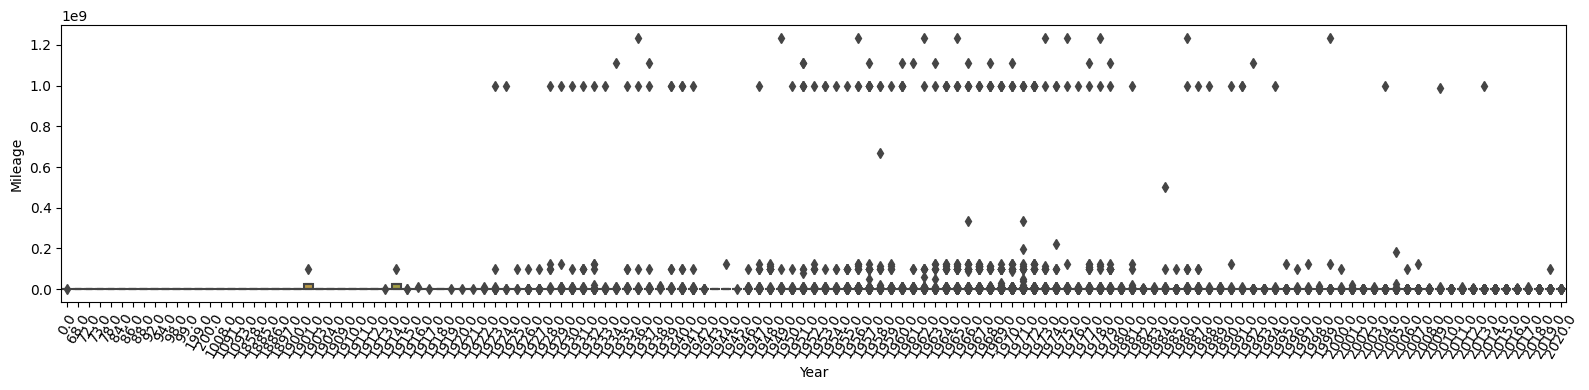

In [23]:
f, ax = plt.subplots(1,1,figsize=(16,4))
sns.boxplot(df_used_cars, x="Year", y="Mileage", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
f.tight_layout()

In [24]:
df_used_cars.Engine.value_counts()

350                                                       2085
V8                                                        1894
V6                                                         929
5.0                                                        612
5.7                                                        590
                                                          ... 
4.7 Liter Magnum V8                                          1
1.6 L/6 Valves                                               1
5.9 liter 360 V8                                             1
1.8L 1798CC 110Cu. In. l4 GAS DOHC Naturally Aspirated       1
M52TU 2.8L                                                   1
Name: Engine, Length: 22398, dtype: int64

In [25]:
df_used_cars.BodyType.value_counts()

Sedan                                  18216
Coupe                                  18046
SUV                                    15352
Convertible                            12327
Standard Cab Pickup                     4289
                                       ...  
Tractor Truck - Medium Conventional        1
Sub                                        1
SPORTS VAN                                 1
CONVENTIONAL CAB                           1
Travelall                                  1
Name: BodyType, Length: 2329, dtype: int64

In [26]:
df_used_cars.NumCylinders.value_counts()

8             43530
0             29981
6             27426
4             18643
5              1005
10              604
12              592
3               181
2               148
1                23
9                 3
350               2
16                1
118               1
2147483647        1
440               1
123               1
Name: NumCylinders, dtype: int64

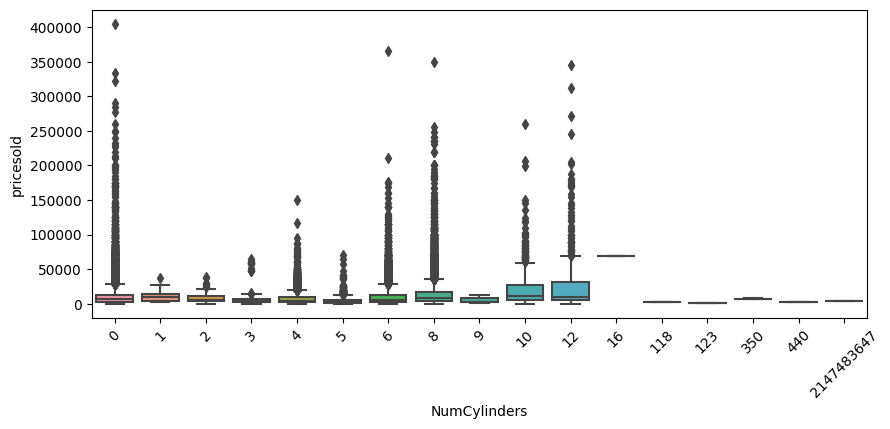

In [27]:
f, ax = plt.subplots(1,1,figsize=(10,4))
sns.boxplot(df_used_cars, x="NumCylinders", y="pricesold", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

We can see that there are rows whith an invalid number of cylinders, specially the one with 21474.., which is likely some overflow

In [28]:
df_used_cars[df_used_cars.NumCylinders==2147483647]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
54295,113727,4200,2020,850**,78900,Ford,E-Series Van,1985.0,custom A-Team,302,Van Camper,2147483647,RWD,2020-06-10


In [29]:
df_used_cars[ (df_used_cars.Model=="E-Series Van") & (df_used_cars.Engine=="302")]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
31071,27220,2840,2019,99205,69000,Ford,E-Series Van,1973.0,NaN,302,NaN,8,4WD,2019-05-21
40400,98260,650,2019,97429,186464,Ford,E-Series Van,1986.0,BASIC,302,Standard Passenger Van,8,RWD,2019-01-18
50026,71848,10000,2020,34698,2000,Ford,E-Series Van,1970.0,E-100,302,Van,8,RWD,2020-05-31
52749,82216,8300,2019,08065,104022,Ford,E-Series Van,1987.0,NaN,302,NaN,8,RWD,2019-11-14
54295,113727,4200,2020,850**,78900,Ford,E-Series Van,1985.0,custom A-Team,302,Van Camper,2147483647,RWD,2020-06-10
64841,85204,3000,2019,57501,79867,Ford,E-Series Van,1989.0,Convertion,302,NaN,8,RWD,2019-09-18


We can see that the models with the same engine have 8 cyllinders. We will replace the value to 8


In [30]:
df_used_cars.loc[54295, "NumCylinders"] = 8

we will do the same procedure for the rows with $NumCylinders >100$. <br>
If we cannot infer the correct value, we will drop the samples as we cannot measure it correctly.

- 440 cylinders

In [31]:
df_used_cars[df_used_cars.NumCylinders==440]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
54563,26567,2520,2019,60110,66000,Dodge,Other Pickups,1974.0,van,none,van,440,RWD,2019-02-09


In [32]:
df_used_cars[ (df_used_cars.Make=="Dodge")  & (df_used_cars.BodyType=="van") ]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
714,72869,7400,2019,11758,104090,Dodge,A100,1965.0,sportsman,273,van,8,RWD,2019-08-24
9424,36121,9100,2019,19116,206000,Dodge,Sprinter,2006.0,2500 Super High Ceiling 140-in. WB,2.7L L5 DOHC 20V TURBO DIESEL,van,5,RWD,2019-07-18
39262,38929,18400,2019,22406,30998,Dodge,Sprinter,2006.0,NaN,2.7,van,0,NaN,2019-02-13
43871,100189,1200,2019,11704,300000,Dodge,Sprinter,2007.0,NaN,NaN,van,6,RWD,2019-10-14
54563,26567,2520,2019,60110,66000,Dodge,Other Pickups,1974.0,van,none,van,440,RWD,2019-02-09
104798,55832,10600,2019,06708,147958,Dodge,Sprinter,2013.0,Sprinter,3.0,van,6,RWD,2019-08-09


We will drop this row

In [33]:
df_used_cars.drop(index=54563, inplace=True)

- 350 cylinders

In [34]:
df_used_cars[df_used_cars.NumCylinders==350]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
50416,51234,6500,2019,24112,60703,Chevrolet,Caprice,1976.0,NaN,V8,Coupe,350,RWD,2019-06-16
116096,90491,7700,2019,29697,999999,Chevrolet,Bel Air/150/210,1957.0,NaN,NaN,Coupe,350,NaN,2019-11-06


Since the motor of the first case is a V8, we can assume that it has 8 cylinders

In [35]:
df_used_cars[(df_used_cars.Make=="Chevrolet") & (df_used_cars.Model=="Bel Air/150/210") & (df_used_cars.BodyType=="Coupe")].NumCylinders.value_counts().nlargest(5)

8      144
0       34
6       18
350      1
Name: NumCylinders, dtype: int64

We can see that most vhicles with the same features of the car *116096* have 8 cylinders.

The ones with 0 seem to be cars without the engine.

In [36]:
df_used_cars.loc[[50416, 116096], "NumCylinders"] = 8

- 123 cylinders

In [37]:
df_used_cars[df_used_cars.NumCylinders==123]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
57809,28786,1200,2019,56554,90343,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,123,RWD,2019-10-30


In [38]:
df_used_cars[(df_used_cars.Make=="Chevrolet") & \
             (df_used_cars.Model=="Other Pickups") & \
             (df_used_cars.DriveType=="RWD") & \
             (df_used_cars.Year==1954) & \
            (df_used_cars.Engine.isna())]#.NumCylinders.value_counts().nlargest(5)

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
501,86975,22000,2019,27893,64048,Chevrolet,Other Pickups,1954.0,NaN,NaN,Standard Cab Pickup,6,RWD,2019-07-06
45227,77031,12500,2019,63012,0,Chevrolet,Other Pickups,1954.0,NaN,NaN,Standard Cab Pickup,6,RWD,2019-05-05
48036,140600,11500,2020,851**,68521,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,6,RWD,2020-07-04
49568,70288,14200,2020,27406,111111,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,0,RWD,2020-06-30
57671,56114,17000,2019,56554,68000,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,6,RWD,2019-02-09
57808,57305,2500,2019,56554,65625,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,6,RWD,2019-11-01
57809,28786,1200,2019,56554,90343,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,123,RWD,2019-10-30
71100,128648,3550,2020,34601,3100,Chevrolet,Other Pickups,1954.0,3100,NaN,Standard Cab Pickup,0,RWD,2020-09-15
86054,146413,10300,2020,146**,93473,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,6,RWD,2020-10-14
86646,142629,400,2020,553**,15257,Chevrolet,Other Pickups,1954.0,NaN,NaN,NaN,6,RWD,2020-09-19


Since we don't know for sure which model this vehicle is, we will drop it

In [39]:
df_used_cars.drop(index=57809, inplace=True)

- 118 cylinders

In [40]:
df_used_cars[df_used_cars.NumCylinders==118]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
42151,150183,2400,2020,W3***,125000,BMW,1-Series,2007.0,NaN,2.0,Hatchback,118,NaN,2020-02-24


In [41]:
df_used_cars[ (df_used_cars.Make=="BMW") & (df_used_cars.Model=="1-Series") & (df_used_cars.BodyType=="Hatchback")]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
42151,150183,2400,2020,W3***,125000,BMW,1-Series,2007.0,NaN,2.0,Hatchback,118,NaN,2020-02-24


Although there are no informations in the dataset, from this [website](https://www.parkers.co.uk/bmw/1-series/review/engines/) we could check that this car has 4 cylinders

In [42]:
df_used_cars.loc[42151, "NumCylinders"] = 4

>123 cylinders

In [43]:
df_used_cars.DriveType.value_counts().nsmallest(10)

BUS                       1
4dr Sdn Auto LS           1
4dr Sdn Sport GT Auto     1
3spd                      1
2WD 4dr 1500 LT w/1LT     1
4dr Quad Cab 155 WB HD    1
4dr Sdn EcoChic           1
2WD Crew Cab 172          1
4WD Crew Cab 153.0 SLE    1
4WD 4dr EX-L w/RES        1
Name: DriveType, dtype: int64

In [44]:
df_used_cars

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
0,137178,7500,2020,786**,84430,Ford,Mustang,1988.0,LX,5.0L Gas V8,Sedan,0,RWD,2020-03-19
1,96705,15000,2019,81006,0,Replica/Kit Makes,Jaguar Beck Lister,1958.0,NaN,383 Fuel injected,Convertible,8,RWD,2019-02-09
2,119660,8750,2020,33449,55000,Jaguar,XJS,1995.0,2+2 Cabriolet,4.0L In-Line 6 Cylinder,Convertible,6,RWD,2020-02-16
3,80773,11600,2019,07852,97200,Ford,Mustang,1968.0,Stock,289 cu. in. V8,Coupe,8,RWD,2019-08-16
4,64287,44000,2019,07728,40703,Porsche,911,2002.0,Turbo X-50,3.6L,Coupe,6,AWD,2019-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122139,14948,4200,2019,80233,102700,Ford,Mustang,1977.0,NaN,302,Fastback,8,NaN,2019-08-31
122140,58814,6500,2019,53132,128000,Ford,E-Series Van,2012.0,NaN,E-150,NaN,0,NaN,2019-03-31
122141,2156,2000,2019,77536,50000,Ford,Bronco,1978.0,NaN,351m,NaN,8,4WD,2019-05-19
122142,29096,2280,2019,92131,164337,BMW,3-Series,2000.0,328ci,M52TU 2.8L,Coupe,6,RWD,2019-05-17


### Clean 'Make' of *used_cars_sales.csv*

- **Many cars with model in the 'Make' Tag** <br>
This problem needs to be addressed element by element

In [45]:
df_used_cars.Make = df_used_cars.Make.apply(str.lower)

In [46]:
df_used_cars.Model= df_used_cars.Model.apply(lambda el: str(el).lower())

##### Internation Harvester manufacturer

In [47]:
sorted(filter(lambda x: "international" in x, df_used_cars.Make.apply(str.lower).unique()))

['1964 international', 'international', 'international harvester']

In [48]:
def filter_(df_string, cond_string, return_string):
    if cond_string in df_string:
        return return_string
    return df_string

df_used_cars.Make = df_used_cars.Make.apply(lambda el: filter_(el, "international", "international harvester"))

##### '2101'

In [49]:
df_used_cars[df_used_cars.Make=="2101"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
91077,45848,6200,2019,11727,46292,2101,nan,1977.0,NaN,NaN,Sedan,4,RWD,2019-07-29


Could not find information about this, we will drop this sample

In [50]:
df_used_cars.drop(index=91077, inplace=True)

##### '300'

In [51]:
df_used_cars[df_used_cars.Make=="300"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
11621,18489,2200,2019,32804,120583,300,chrysler,2006.0,LIMITED,V-6,SEDAN,6,RWD,2019-11-07


For this case, the model and make are swaped

In [52]:
make = df_used_cars.loc[11621, "Model"]
model = df_used_cars.loc[11621, "Make"]

df_used_cars.loc[11621, "Model"] = model
df_used_cars.loc[11621, "Make"] = make

##### ac

In [53]:
df_used_cars[df_used_cars.Make=="ac cobra"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
101440,3285,7900,2019,35565,100,ac cobra,nan,1965.0,NaN,V8,NaN,0,NaN,2019-06-06


In [54]:
df_used_cars.loc[101440, "Make"] = "ac"
df_used_cars.loc[101440, "Model"] = "cobra"

##### amc

In [55]:
df_used_cars[df_used_cars.Make=="amc / rambler"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
27484,116452,10000,2020,977**,113055,amc / rambler,rebel,1967.0,SST Convertible,V8 5.6L,Convertible,0,--,2020-04-14


In [56]:
df_used_cars.loc[27484, "Make"] = "amc"
df_used_cars.loc[27484, "Model"] = "rambler rebel"

##### american motors

In [57]:
df_used_cars[df_used_cars.Make=="amercan"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
51245,18132,610,2019,77532,100000,amercan,rambler,1969.0,NaN,NaN,Sedan,0,NaN,2019-06-26


In [58]:
df_used_cars.loc[51245, "Make"] = "american motors"

##### austin / austin princess

In [59]:
df_used_cars[df_used_cars.Make=="austin princess"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
18958,138091,5000,2020,439**,34000,austin princess,nan,1960.0,NaN,NaN,Limousine,6,NaN,2020-02-02


In [60]:
df_used_cars.loc[18958, "Make"] = "austin"
df_used_cars.loc[18958, "Model"] = "princess"

##### austin-healey

In [61]:
df_used_cars[df_used_cars.Make=="austin-healey"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
13592,146046,10700,2020,600**,19323,austin-healey,100-4,1956.0,NaN,1B220126M,Convertible,0,RWD,2020-09-18
16344,133958,5000,2020,211**,58738,austin-healey,sprite mk iv,1967.0,NaN,4 Cyl,Convertible,0,RWD,2020-04-21
54007,149146,4050,2020,465**,35140,austin-healey,sprite mk iv,1968.0,NaN,1275,Convertible,0,RWD,2020-09-15
54965,133942,2820,2020,472**,56000,austin-healey,sprite,1959.0,NaN,948 cc,Convertible,0,RWD,2020-07-27
82225,160054,7000,2020,726**,50000,austin-healey,austin healey bugeye sprite,1958.0,NaN,1200&1500cc,Convertible,0,RWD,2020-09-20
86971,162368,8100,2020,221**,101631,austin-healey,3000,1967.0,MKlll BJ8,2.9L 6 cylinder,Sports car,6,RWD,2020-05-30


In [62]:
df_used_cars.Make = df_used_cars.Make.apply(lambda el: filter_(el, "austin-healey", "austin healey"))

##### bmw 

In [63]:
df_used_cars[df_used_cars.Make=="bmw"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
65,44820,16000,2019,40222,24800,bmw,7-series,1998.0,NaN,V8,Sedan,0,NaN,2019-04-18
69,150216,5000,2020,800**,170285,bmw,3-series,1989.0,I AUTOMATIC,2.5L Gas I6,Convertible,6,RWD,2020-10-12
89,161768,3700,2020,708**,51939,bmw,x1,2014.0,NaN,NaN,NaN,4,AWD,2020-08-20
113,71334,2000,2019,32223,153451,bmw,3-series,2006.0,325i,3.0 I6,Sedan,6,RWD,2019-02-01
181,75758,7000,2019,92108,102700,bmw,m3,2005.0,Automatic,3.2,Convertible,6,RWD,2019-03-06


In [64]:
df_used_cars[df_used_cars.Make=="bmw 3 series"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78485,11740,3380,2019,19116,136356,bmw 3 series,328i wagon,2007.0,328i,Straight 6 Cylinder Engine 3.0L/183,Station Wagon,0,4dr Sports Wgn 328i RWD,2019-07-17


In [65]:
df_used_cars.loc[78485, "Make"] = "bmw"

In [66]:
df_used_cars[df_used_cars.Make=="bmw 335i"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78484,11452,6400,2018,19116,115227,bmw 335i,carfax accident free,2011.0,335i,Straight 6 Cylinder Engine 3.0L/183,4dr Car,0,4dr Sdn 335i RWD,2018-08-26


In [67]:
df_used_cars.loc[78484, "Make"] = "bmw"
df_used_cars.loc[78484, "Model"] = "335i"

In [68]:
df_used_cars[df_used_cars.Make=="bmw 530 sport pkg"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78481,12560,4450,2019,19116,65811,bmw 530 sport pkg,5 series one owner,2002.0,530iA,Straight 6 Cylinder Engine 3.0L/183,4dr Car,0,530iA 4dr Sdn 5-Spd Auto,2019-06-29


In [69]:
df_used_cars.loc[78481, "Make"] = "bmw"
df_used_cars.loc[78481, "Model"] = "530 sport"

In [70]:
df_used_cars[df_used_cars.Make=="bmw 535i xdrive awd"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78482,12299,9700,2019,19116,96000,bmw 535i xdrive awd,carfax one owner,2011.0,NAV ONLY 96k TWIN TURBO,Straight 6 Cylinder Engine 3.0L/182,4dr Car,0,AWD,2019-10-19


In [71]:
df_used_cars.loc[78482, "Make"] = "bmw"
df_used_cars.loc[78482, "Model"] = "535i xdrive"

In [72]:
df_used_cars[df_used_cars.Make=="bmw 750li xdrive"]

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78487,28085,23200,2019,19116,16500,bmw 750li xdrive,m-sport only 16k,2015.0,Fully Loaded,8 Cylinder Engine 4.4L,4dr Car,0,AWD,2019-09-13


In [73]:
df_used_cars.loc[78487, "Make"] = "bmw"
df_used_cars.loc[78487, "Model"] = "750li"

##### buick

In [74]:
df_used_cars[df_used_cars.Make=="buick"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
16,144540,3330,2020,856**,47692,buick,lesabre,2004.0,CUSTOM,3.8L Gas V6,Sedan,6,FWD,2020-09-01
52,64048,500,2019,90028,40000,buick,riviera,1977.0,NaN,NaN,NaN,0,NaN,2019-08-22
211,153904,10000,2020,927**,70653,buick,riviera,1965.0,NaN,NaN,Sedan,8,NaN,2020-01-27
274,80139,2500,2019,48509,102000,buick,grand national,1985.0,T-type,NaN,Coupe,6,RWD,2019-08-28
515,114145,12750,2020,19350,114000,buick,grand national,1987.0,NaN,NaN,NaN,6,V-6,2020-02-21


In [75]:
df_used_cars[df_used_cars.Make=="buick lesabre"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78337,90395,3250,2019,19116,68421,buick lesabre,carfax accident free,2005.0,Custom Only 68k,V6 Cylinder Engine 3.8L/231,4dr Car,0,FWD,2019-02-17


In [76]:
df_used_cars.loc[78337, "Make"] = "buick"
df_used_cars.loc[78337, "Model"] = "lesabre"

In [77]:
df_used_cars[df_used_cars.Make=="buick only 88k 5.7l"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78336,147515,3440,2020,191**,88152,buick only 88k 5.7l,roadmaster wagon,1993.0,Estate,8 Cylinder Engine 5.7L/350,--,0,4dr Wagon Estate,2020-12-19


In [78]:
df_used_cars.loc[78336, "Make"] = "buick"

##### cadillac

In [79]:
df_used_cars[df_used_cars.Make=="cadillac"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
50,102288,5600,2019,60491,143250,cadillac,cts,2010.0,Performance,3.6,Wagon,6,AWD,2019-11-24
51,88979,6500,2019,06268,89000,cadillac,allante,1988.0,NaN,4.1 Liter V-8,2-seater convertible,8,FWD,2019-06-03
63,131515,9600,2020,402**,18100,cadillac,fleetwood,1984.0,Brougham d’Elegance,4.1L V8 OHV 16V,Sedan,8,RWD,2020-03-17
67,149334,10000,2020,800**,101862,cadillac,deville sedan,1966.0,NaN,7.0l,Sedan,0,RWD,2020-07-17
124,91901,8200,2019,04284,50000,cadillac,other,1937.0,LIMOUSINE,346 cubic inches,Limousine,8,RWD,2019-12-31


In [80]:
df_used_cars[df_used_cars.Make=="cadillac deville"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78343,12009,5100,2019,19116,44466,cadillac deville,only 44k no reserve,2002.0,2 OWN,8 Cylinder Engine 4.6L/279,4dr Car,0,FWD,2019-07-22


In [81]:
df_used_cars.loc[78343, "Make"] = "cadillac"
df_used_cars.loc[78343, "Model"] = "deville"

In [82]:
df_used_cars[df_used_cars.Make=="cadillac one owner"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78348,120086,2850,2020,191**,86971,cadillac one owner,seville sls only 86k,2002.0,Luxury SLS,8 Cylinder Engine 4.6L/279,4dr Car,0,FWD,2020-10-24


In [83]:
df_used_cars.loc[78348, "Make"] = "cadillac"
df_used_cars.loc[78348, "Model"] = "seville sls"

In [84]:
df_used_cars[df_used_cars.Make=="cadillac only 59k"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78345,147640,4450,2020,191**,59797,cadillac only 59k,deville dhs,2002.0,DHS,8 Cylinder Engine 4.6L/279,4dr Car,0,FWD,2020-01-24


In [85]:
df_used_cars[df_used_cars.Make=="cadillac only 80k"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78347,120098,3450,2020,191**,80940,cadillac only 80k,deville dts,2003.0,DTS,8 Cylinder Engine 4.6L/279,4dr Car,0,FWD,2020-04-05


In [86]:
df_used_cars[df_used_cars.Make=="cadillac only 82k"].head()

,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
78342,148024,3650,2020,191**,82990,cadillac only 82k,deville one owner,2003.0,NaN,8 Cylinder Engine 4.6L/279,4dr Car,0,FWD,2020-10-14


In [87]:
df_used_cars.loc[78345, "Make"] = "cadillac"
df_used_cars.loc[78347, "Make"] = "cadillac"
df_used_cars.loc[78342, "Make"] = "cadillac"
df_used_cars.loc[78342, "Model"] = "deville"

##### chevrolet

In [88]:
df_used_cars[df_used_cars.Make=="cheverolet"]
df_used_cars.loc[[30613, 99426], "Make"] = "chevrolet"

In [89]:
df_used_cars[df_used_cars.Make=="chevrolet 2500 only 65k"]
df_used_cars.loc[78358, "Make"] = "chevrolet"
df_used_cars.loc[78358, "Model"] = "2500"

In [90]:
df_used_cars[df_used_cars.Make=="chevrolet 3500 handicap"]
df_used_cars.loc[78349, "Make"] = "chevrolet"
df_used_cars.loc[78349, "Model"] = "3500 handicap"

In [91]:
df_used_cars[df_used_cars.Make=="chevrolet astro cargo van"]
df_used_cars.loc[78352, "Make"] = "chevrolet"
df_used_cars.loc[78352, "Model"] = "astro"

df_used_cars.loc[78353, "Make"] = "chevrolet"
df_used_cars.loc[78353, "Model"] = "astro"

df_used_cars.loc[78356, "Make"] = "chevrolet"
df_used_cars.loc[78356, "Model"] = "astro"

In [92]:
df_used_cars[df_used_cars.Make=="chevrolet astro only 77k"]
df_used_cars.loc[78355, "Make"] = "chevrolet"
df_used_cars.loc[78355, "Model"] = "astro"

In [93]:
df_used_cars[df_used_cars.Make=="chevrolet avalanche"]
df_used_cars.loc[78397, "Make"] = "chevrolet"
df_used_cars.loc[78397, "Model"] = "avalanche z71"

In [94]:
df_used_cars[df_used_cars.Make=="chevrolet colorado"]
df_used_cars.loc[78351, "Make"] = "chevrolet"
df_used_cars.loc[78351, "Model"] = "colorado"

In [95]:
df_used_cars[df_used_cars.Make=="chevrolet express"]
df_used_cars.loc[78350, "Make"] = "chevrolet"
df_used_cars.loc[78350, "Model"] = "express"

In [96]:
df_used_cars[df_used_cars.Make=="chevrolet express 3500"]
df_used_cars.loc[78360, "Make"] = "chevrolet"
df_used_cars.loc[78360, "Model"] = "express 3500"

In [97]:
df_used_cars[df_used_cars.Make=="chevrolet hhr ls panel"]
df_used_cars.loc[78396, "Make"] = "chevrolet"
df_used_cars.loc[78396, "Model"] = "hhr"

In [98]:
df_used_cars[df_used_cars.Make=="chevrolet one owner"]
df_used_cars.loc[78370, "Make"] = "chevrolet"
df_used_cars.loc[78370, "Model"] = "tahoe"

In [99]:
df_used_cars[df_used_cars.Make=="chevrolet only 38k"]
df_used_cars.loc[78367, "Make"] = "chevrolet"
df_used_cars.loc[78367, "Model"] = "uplander"

In [100]:
df_used_cars[df_used_cars.Make=="chevrolet only 56k"]
df_used_cars.loc[78359, "Make"] = "chevrolet"
df_used_cars.loc[78359, "Model"] = "express"

In [101]:
df_used_cars[df_used_cars.Make=="chevrolet only 79k"]
df_used_cars.loc[78354, "Make"] = "chevrolet"
df_used_cars.loc[78354, "Model"] = "astro"

In [102]:
df_used_cars[df_used_cars.Make=="chevrolet venture"]
df_used_cars.loc[78368, "Make"] = "chevrolet"
df_used_cars.loc[78368, "Model"] = "venture"

##### chrysler

In [103]:
df_used_cars[df_used_cars.Make=="chrylser"]
df_used_cars.loc[3267, "Make"] = "chrysler"

In [104]:
df_used_cars[df_used_cars.Make=="chrysler windsor"]
df_used_cars.loc[37146, "Make"] = "chrysler"

##### citroen

In [105]:
df_used_cars.loc[df_used_cars.Make=="citroën"] = "citroen"

In [106]:
df_used_cars[df_used_cars.Make=="citroen ds19"]
df_used_cars.loc[42257, "Make"] = "citroen"

##### comuta car

In [107]:
df_used_cars[df_used_cars.Make=="comuta-car"]


,ID,pricesold,yearsold,zipcode,Mileage,Make,Model,Year,Trim,Engine,BodyType,NumCylinders,DriveType,datesold
92545,75125,940,2019,08742,514,comuta-car,nan,1980.0,NaN,Electric,Coupe,0,NaN,2019-09-21 00:00:00


In [108]:
df_used_cars[df_used_cars.Make=="crhysler"]
df_used_cars.loc[17860].Make = "chrysler"

In [109]:
df_used_cars[df_used_cars.Make=="CHRYSLER"]
df_used_cars.loc[11621].Make = "chrysler"

##### dodge

In [110]:
df_used_cars[df_used_cars.Make=="dodge cargo van"]
df_used_cars.loc[78387, "Make"] = "dodge"
df_used_cars.loc[78387, "Model"] = "grand caravan"

In [111]:
df_used_cars[df_used_cars.Make=="dodge grand caravan sxt"]
df_used_cars.loc[78388, "Make"] = "dodge"
df_used_cars.loc[78388, "Model"] = "grand caravan sxt"

In [112]:
df_used_cars[df_used_cars.Make=="dodge one owner"]
df_used_cars.loc[78386, "Make"] = "dodge"
df_used_cars.loc[78386, "Model"] = "grand caravan"

In [113]:
df_used_cars[df_used_cars.Make=="dodge only 36k"]
df_used_cars.loc[78389, "Make"] = "dodge"
df_used_cars.loc[78389, "Model"] = "grand caravan"

##### excalibur

In [114]:
df_used_cars[df_used_cars.Make=="excalibur series ii other"]
df_used_cars.drop(index=95438, inplace=True)

##### ford

In [115]:
df_used_cars[df_used_cars.Make=="ford 4x4"]
df_used_cars.loc[78298, "Make"]="ford"
df_used_cars.loc[78298, "Model"]="bronco"

In [116]:
df_used_cars[df_used_cars.Make=="ford carfax accident free"]
df_used_cars.loc[78297, "Make"]="ford"
df_used_cars.loc[78297, "Model"]="escape hybrid"

In [117]:
df_used_cars[df_used_cars.Make=="ford e-250 one owner"]
df_used_cars.loc[78317, "Make"]="ford"
df_used_cars.loc[78317, "Model"]="e250"

df_used_cars.loc[78319, "Make"]="ford"
df_used_cars.loc[78319, "Model"]="e250"

In [118]:
df_used_cars[df_used_cars.Make=="ford e-350"]
df_used_cars.loc[78326, "Make"]="ford"
df_used_cars.loc[78326, "Model"]="e350"

df_used_cars.loc[78327, "Make"]="ford"
df_used_cars.loc[78327, "Model"]="e350"

In [119]:
df_used_cars[df_used_cars.Make=="ford e150 only 70k"]
df_used_cars.loc[78314, "Make"]="ford"
df_used_cars.loc[78314, "Model"]="e150"

In [120]:
df_used_cars[df_used_cars.Make=="ford e350"]
df_used_cars.loc[78324, "Make"]="ford"
df_used_cars.loc[78324, "Model"]="e350"

In [121]:
df_used_cars[df_used_cars.Make=="ford e350 diesel"]
df_used_cars.loc[78330, "Make"]="ford"
df_used_cars.loc[78330, "Model"]="e350"

In [122]:
df_used_cars[df_used_cars.Make=="ford explorer xlt 4x4"]
df_used_cars.loc[78311, "Make"]="ford"
df_used_cars.loc[78311, "Model"]="explorer xlt"

In [123]:
df_used_cars[df_used_cars.Make=="ford f-150 xlt 4x$"]
df_used_cars.loc[78323, "Make"]="ford"
df_used_cars.loc[78323, "Model"]="f-150 xlt"

In [124]:
df_used_cars[df_used_cars.Make=="ford handicap"]
df_used_cars.loc[78284, "Make"]="ford"
df_used_cars.loc[78284, "Model"]="e150 handicap"

In [125]:
df_used_cars[df_used_cars.Make=="ford nav 3rd row"]
df_used_cars.loc[78307, "Make"]="ford"
df_used_cars.loc[78307, "Model"]="expedition"

In [126]:
df_used_cars[df_used_cars.Make=="ford one owner"]
df_used_cars.loc[78289, "Make"]="ford"
df_used_cars.loc[78289, "Model"]="escape hybrid"

df_used_cars.loc[78322, "Make"]="ford"
df_used_cars.loc[78322, "Model"]="f-150"

In [127]:
df_used_cars[df_used_cars.Make=="ford only 60k"]
df_used_cars.loc[78330, "Make"]="ford"
df_used_cars.loc[78330, "Model"]="expedition"

df_used_cars.loc[78306, "Make"]="ford"
df_used_cars.loc[78306, "Model"]="expedition"

In [128]:
df_used_cars[df_used_cars.Make=="ford passenger van"]
df_used_cars.loc[78308, "Make"]="ford"
df_used_cars.loc[78308, "Model"]="e150"

##### gmc

In [129]:
df_used_cars[df_used_cars.Make=="gmc awd"]
df_used_cars.loc[78364, "Make"]="gmc"


##### honda

In [130]:
df_used_cars[df_used_cars.Make=="honda civic ex"]
df_used_cars.loc[78277, "Make"]="honda"
df_used_cars.loc[78277, "Model"]="civic"


In [131]:
df_used_cars[df_used_cars.Make=="honda odyssey"]
df_used_cars.loc[78415, "Make"]="honda"
df_used_cars.loc[78415, "Model"]="odyssey"

In [132]:
df_used_cars[df_used_cars.Make=="honda only 89k"]
df_used_cars.loc[78414, "Make"]="honda"
df_used_cars.loc[78414, "Model"]="odyssey"

##### hummer

In [133]:
df_used_cars[df_used_cars.Make=="hummer h1"]
df_used_cars.loc[49585, "Make"]="hummer"
df_used_cars.loc[49585, "Model"]="h1"

In [134]:
df_used_cars[df_used_cars.Make=="hummer h-1"]
df_used_cars.loc[118309, "Make"]="hummer"
df_used_cars.loc[118309, "Model"]="h1"

##### hyundai

In [135]:
df_used_cars[df_used_cars.Make=="hyundai santa fe gls"]
df_used_cars.loc[78468, "Make"]="hyundai"
df_used_cars.loc[78468, "Model"]="santa fe"

##### jaguar

In [136]:
df_used_cars[df_used_cars.Make=="jaguar xj8"]
df_used_cars.loc[78470, "Make"]="jaguar"
df_used_cars.loc[78470, "Model"]="xj8"

##### jeep

In [137]:
df_used_cars[df_used_cars.Make=="jeep 4x4"]
df_used_cars.loc[78375, "Make"]="jeep"
df_used_cars.loc[78375, "Model"]="compass"

df_used_cars.loc[78378, "Make"]="jeep"
df_used_cars.loc[78378, "Model"]="cherokee"

In [138]:
df_used_cars[df_used_cars.Make=="jeep one owner"]
df_used_cars.loc[78377, "Make"]="jeep"
df_used_cars.loc[78377, "Model"]="cherokee"

In [139]:
df_used_cars[df_used_cars.Make=="jeep only 68k"]
df_used_cars.loc[78379, "Make"]="jeep"
df_used_cars.loc[78379, "Model"]="cherokee"

##### land rover

In [140]:
df_used_cars[df_used_cars.Make=="landrover"]
df_used_cars.loc[88843, "Make"]="land rover"


In [141]:
df_used_cars[df_used_cars.Make=="land rover 4wd"]
df_used_cars.loc[78474, "Make"]="land rover"
df_used_cars.loc[78474, "Model"]="discovery"

##### lexus

In [142]:
df_used_cars[df_used_cars.Make=="lexus es330"]
df_used_cars.loc[78456, "Make"]="lexus"
df_used_cars.loc[78456, "Model"]="es330"

##### lincoln

In [143]:
df_used_cars[df_used_cars.Make=="lincoln only 49k"]
df_used_cars.loc[78381, "Make"]="lincoln"
df_used_cars.loc[78381, "Model"]="town car"

##### mazda

In [144]:
df_used_cars[df_used_cars.Make=="mazda 5 speed manual"]
df_used_cars.loc[78436, "Make"]="mazda"
df_used_cars.loc[78436, "Model"]="mazda3"

In [145]:
df_used_cars[df_used_cars.Make=="mazda mx-5 miata"]
df_used_cars.loc[78439, "Make"]="mazda"
df_used_cars.loc[78439, "Model"]="mx5 miata"

##### mercedes

In [146]:
df_used_cars[df_used_cars.Make=="mercedes-b"]
df_used_cars.loc[33493, "Make"]="mercedes-benz"

In [147]:
df_used_cars[df_used_cars.Make=="mercedes"]
df_used_cars.loc[72223, "Make"]="mercedes-benz"

df_used_cars.loc[80682, "Make"]="mercedes-benz"

In [148]:
df_used_cars[df_used_cars.Make=="mercedes-benz diesel"]
df_used_cars.loc[78405, "Make"]="mercedes-benz"
df_used_cars.loc[78405, "Model"]="r-class"

In [149]:
df_used_cars[df_used_cars.Make=="mercedes benz"]
df_used_cars.loc[8702, "Make"]="mercedes-benz"

df_used_cars.loc[45334, "Make"]="mercedes-benz"

df_used_cars.loc[69462, "Make"]="mercedes-benz"
df_used_cars.loc[69462, "Model"]="slk 230 amg"

In [150]:
df_used_cars[df_used_cars.Make=="mercedes-benz only 22k"]
df_used_cars.loc[78490, "Make"]="mercedes-benz"
df_used_cars.loc[78490, "Model"]="300"

##### oldmobile

In [151]:
df_used_cars[df_used_cars.Make=="oldsmobile 1967 442"]
df_used_cars.loc[64746, "Make"]="oldsmobile"
df_used_cars.loc[64746, "Model"]="442"

##### opel

In [152]:
df_used_cars[df_used_cars.Make=="opel manta"]
df_used_cars.loc[66040, "Make"]="opel"
df_used_cars.loc[66040, "Model"]="manta rallye"

##### pontiac

In [153]:
df_used_cars[df_used_cars.Make=="pontiac vibe"]
df_used_cars.loc[78427, "Make"]="pontiac"
df_used_cars.loc[78427, "Model"]="vibe"

In [154]:
df_used_cars[df_used_cars.Make=="ram dodge c/v"]
df_used_cars.loc[78385, "Make"]="dodge"
df_used_cars.loc[78385, "Model"]="ram"

In [155]:
df_used_cars[df_used_cars.Make=="rover"]
df_used_cars.loc[48577, "Make"]="mini"
df_used_cars.loc[48577, "Model"]="cooper"

##### saab

In [156]:
df_used_cars[df_used_cars.Make=="saab only 73k"]
df_used_cars.loc[78502, "Make"]="saab"
df_used_cars.loc[78502, "Model"]="93"

##### saturn

In [157]:
df_used_cars[df_used_cars.Make=="saturn vue hybrid"]
df_used_cars.loc[78399, "Make"]="saturn"
df_used_cars.loc[78399, "Model"]="vue"

##### subaru

In [158]:
df_used_cars[df_used_cars.Make=="subaru 6 speed manual"]
df_used_cars.loc[78410, "Make"]="subaru"
df_used_cars.loc[78410, "Model"]="outback"

In [159]:
df_used_cars[df_used_cars.Make=="subaru awd wagon"]
df_used_cars.loc[78431, "Make"]="subaru"
df_used_cars.loc[78431, "Model"]="forester"

In [160]:
df_used_cars[df_used_cars.Make=="subaru forester awd"]
df_used_cars.loc[78429, "Make"]="subaru"
df_used_cars.loc[78429, "Model"]="forester"

df_used_cars.loc[78430, "Make"]="subaru"
df_used_cars.loc[78430, "Model"]="forester"

##### suzuki

In [161]:
df_used_cars[df_used_cars.Make=="suzuki only 27k"]
df_used_cars.loc[78442, "Make"]="suzuki"
df_used_cars.loc[78442, "Model"]="kizashi"

##### toyota

In [162]:
df_used_cars[df_used_cars.Make=="toyota 4runner sr5 4wd"]
df_used_cars.loc[78444, "Make"]="toyota"
df_used_cars.loc[78444, "Model"]="4runner"

df_used_cars.loc[78445, "Make"]="toyota"
df_used_cars.loc[78445, "Model"]="4runner"

In [163]:
df_used_cars[df_used_cars.Make=="toyota highlander hybrid"]
df_used_cars.loc[78452, "Make"]="toyota"
df_used_cars.loc[78452, "Model"]="highlander hybrid"

In [164]:
df_used_cars[df_used_cars.Make=="toyota nav"]
df_used_cars.loc[78465, "Make"]="toyota"
df_used_cars.loc[78465, "Model"]="camry hybrid"

In [165]:
df_used_cars[df_used_cars.Make=="toyota one owner"]
df_used_cars.loc[78446, "Make"]="toyota"
df_used_cars.loc[78446, "Model"]="4runner"

df_used_cars.loc[78448, "Make"]="toyota"
df_used_cars.loc[78448, "Model"]="prius hybrid"

df_used_cars.loc[78467, "Make"]="toyota"
df_used_cars.loc[78467, "Model"]="camry hybrid"

In [166]:
df_used_cars[df_used_cars.Make=="toyota rear diff lock"]
df_used_cars.loc[78443, "Make"]="toyota"
df_used_cars.loc[78443, "Model"]="4runner"

In [167]:
df_used_cars[df_used_cars.Make=="toyota sienna"]
df_used_cars.loc[78424, "Make"]="toyota"
df_used_cars.loc[78424, "Model"]="sienna"

##### volkswagen

In [168]:
df_used_cars[df_used_cars.Make=="volkswagen jetta gls"]
df_used_cars.loc[78404, "Make"]="volkswagen"
df_used_cars.loc[78404, "Model"]="jetta"

In [169]:
df_used_cars[df_used_cars.Make=="volkswagen passat 47k gl"]
df_used_cars.loc[78500, "Make"]="volkswagen"
df_used_cars.loc[78500, "Model"]="passat"

In [170]:
df_used_cars[df_used_cars.Make=="volkswagon"]
df_used_cars.loc[109173, "Make"]="volkswagen"


##### volvo

In [171]:
df_used_cars[df_used_cars.Make=="volvo only 64k"]
df_used_cars.loc[78505, "Make"]="volvo"
df_used_cars.loc[78505, "Model"]="s70"

In [172]:
df_used_cars[df_used_cars.Make=="volvo only 84k"]
df_used_cars.loc[78509, "Make"]="volvo"
df_used_cars.loc[78509, "Model"]="s60"

In [173]:
df_used_cars[df_used_cars.Make=="volvo v70"]
df_used_cars.loc[78511, "Make"]="volvo"
df_used_cars.loc[78511, "Model"]="v70"

##### zimmer

In [174]:
df_used_cars[df_used_cars.Make=="zimmer  golden spirit"]
df_used_cars.loc[57855, "Make"]="zimmer"
df_used_cars.loc[57855, "Model"]="golden spirit"

In [175]:
df_used_cars[(df_used_cars.Model=="nan")].index

Int64Index([    17,    103,    125,    126,    140,    174,    237,    260,
               352,    378,
            ...
            120907, 121006, 121237, 121303, 121305, 121471, 121736, 121755,
            121851, 122108],
           dtype='int64', length=529)

In [176]:
df_used_cars.shape

(122139, 14)

In [177]:
df_used_cars.drop(index=df_used_cars[(df_used_cars.Model=="nan")].index, inplace=True)

In [178]:
df_used_cars.shape

(121610, 14)

In [179]:
df_used_cars.dropna().shape

(60330, 14)

In [180]:
zdb = ZipCodeDatabase()

def get_state(code):
    try:
        data = zdb[code]
        return data.state.lower()
    except:
        return np.nan
    
def get_long(code):
    try:
        data = zdb[code]
        return data.longitude
    except:
        return np.nan
    
def get_lat(code):
    try:
        data = zdb[code]
        return data.latitude
    except:
        return np.nan

In [181]:
df_used_cars.zipcode = df_used_cars.zipcode.apply(lambda x: str(x).replace("*", "1").replace("0", "1"))

In [182]:
df_used_cars["lat"] = df_used_cars.zipcode.apply(get_lat)

In [183]:
df_used_cars["long"] = df_used_cars.zipcode.apply(get_long)

In [184]:
df_used_cars["state"] = df_used_cars.zipcode.apply(get_state)

In [185]:
df_used_cars.isna().sum()[df_used_cars.isna().sum()>0]

Trim         48448
Engine       26734
BodyType     20506
DriveType    24520
lat          33348
long         33348
state        33348
dtype: int64

By the diagram we can see that the Trim does not connect to any of the other datasources, therefore it will not be needed. It is also the column with the most amount of information missing, which will lead to more usable samples

In [186]:
df_used_cars.drop(columns="Trim", inplace=True)

We saw some samples that had "0" Cyllinders, but the engine name refers the number of cylinders. 

In [187]:
df_used_cars.Engine.value_counts()

350                        2077
V8                         1891
V6                          926
5.0                         612
5.7                         590
                           ... 
Volkswagen Beetle             1
351 ford racing motor         1
4.1 liter v8                  1
200 inline six cylinder       1
M52TU 2.8L                    1
Name: Engine, Length: 22319, dtype: int64

In [188]:
df_used_cars['Engine'] = df_used_cars['Engine'].str.lower()
df_used_cars.Engine.value_counts()

v8                        2217
350                       2077
v6                        1105
5.0                        612
5.7                        590
                          ... 
6200                         1
454 (350hp)                  1
4 cylinder 2.5 in line       1
302. 5.0                     1
m52tu 2.8l                   1
Name: Engine, Length: 19824, dtype: int64

In [189]:
# Filter rows where NumCylinders is 0 and Engine contains v8...
mask = (df_used_cars['NumCylinders'] == 0) & (df_used_cars['Engine'].str.contains('v8|v7|v6|v5|v4|v3|v2|v1|i8|i7|i6|i5|i4|i3|i2|i1'))

# Set NumCylinders based on Engine
for i in range(1,8+1):
    df_used_cars.loc[mask & df_used_cars['Engine'].str.contains(f'v{i}|i{i}'), 'NumCylinders'] = i

In [190]:
df_used_cars.isna().sum()

ID                  0
pricesold           0
yearsold            0
zipcode             0
Mileage             0
Make                0
Model               0
Year                0
Engine          26734
BodyType        20506
NumCylinders        0
DriveType       24520
datesold            0
lat             33348
long            33348
state           33348
dtype: int64

In [191]:
[np.nan, "none", "no engine", "0", "no motor", "--"]

[nan, 'none', 'no engine', '0', 'no motor', '--']

In [203]:
df_used_cars.loc[df_used_cars.Engine=="none", "Engine"] = np.nan

In [204]:
df_used_cars.loc[df_used_cars.Engine=="no engine", "Engine"] = np.nan

In [205]:
df_used_cars.loc[df_used_cars.Engine=="0", "Engine"] = np.nan

In [206]:
df_used_cars.loc[df_used_cars.Engine=="no motor", "Engine"] = np.nan

In [207]:
df_used_cars.loc[df_used_cars.Engine=="--", "Engine"] = np.nan

## In the *make* column, we set the values uniform and like in other datasets

In [209]:
df_used_cars.Make = df_used_cars.Make.apply(str.lower)
df_used_cars.Model = df_used_cars.Model.apply(str.lower)

In [210]:
df_used_cars.Make = df_used_cars.Make.apply(filter_manufacturers)

In [211]:
df_used_cars.dropna(subset=["Make", "lat", "long", "state"], inplace=True)

In [212]:
df_used_cars.shape

(87296, 16)

In [213]:
df_used_cars["Model"] = list(map(
    lambda make, model: 
    get_parse_from_model_str(make).parse_model(model).get_model(), 
    df_used_cars.Make, 
    df_used_cars.Model
))

In [214]:
df_used_cars.dropna(subset=["Model"], inplace=True)

In [215]:
df_used_cars.shape

(72590, 16)

We will infer the fuel of the vehicle through the engine they have

This columns does not relate to other tables either so afterwards we will drop it

In [230]:
len(list(filter(lambda x: "dc" in str(x), df_used_cars.Engine.unique())))

5

In [229]:
len(list(filter(lambda x: "ac" in str(x), df_used_cars.Engine.unique())))

140

In [236]:
df_used_cars.BodyType = df_used_cars.BodyType.apply(lambda x: x.lower() if x==x else x)

In [237]:
fuel = ["gas", "diesel", "hybrid", "eletric", "gas/eletric"]

In [246]:
def infere_fuel(data):
    fuel = {
        "diesel":["diesel", "tdi"],
        "eletric":["elec", " ac", " dc", "ac ", "dc "],
    }
    
    gas_type = []
    for e, b in zip(data.Engine, data.BodyType):
        is_found=0
        for fuelvalue in fuel:
            
            if is_found==1:
                break
            
            for fuel_filter in fuel[fuelvalue]:
                if e==e and b==b:
                    if fuel_filter in e or fuel_filter in b:
                        gas_type.append(fuelvalue)
                        is_found=1
                        break
                    
        if is_found==0:
            gas_type.append("gas")
    return gas_type

In [247]:
df_used_cars["fuel"] = infere_fuel(df_used_cars)

In [248]:
df_used_cars.fuel.value_counts()

gas        70519
diesel      1656
eletric      415
Name: fuel, dtype: int64

In [249]:
df_used_cars.shape

(72590, 17)

## Save processed data

In [250]:
#df_used_cars = 
df_used_cars.to_csv(f"{PROC_PATH}/used_car_sales.csv", index=False)